In [1]:
suppressPackageStartupMessages({
  library(future)
  library(Seurat)
  library(tidyverse)
  library(Seurat)
  library(ggplot2)
  library(ggrastr)   # for geom_point_rast()
  library(ggrepel)   # for geom_text_repel()
  library(dplyr)
  library(forcats)
  library(pals)      # for glasbey palette (distinct, color-blind-friendly)
  library(stringr)
  library(svglite)  
  library(RColorBrewer) # For generating high-quality color palettes
  library(cowplot)      # For the 'theme_cowplot' (a clean, minimal theme)
})

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”


Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘tidyr’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
Warning message:
“package ‘ggrastr’ was built under R version 4.4.3”
Warning message:
“package ‘ggrepel’ was built under R version 4.4.3”
Warning message:
“package ‘pals’ was built under R version 4.4.3”
Warning message:
“package ‘svglite’ was built under R version 4.4.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.4.3”
Warning message:
“package ‘cowplot’ was built under R version 4.4.3”


# Load Data

In [ ]:
# obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/obj_full/harmony_cleaned_annotated_v2.rds')
# # Remove specified cell type annotations from the Seurat object
# remove_types <- c("Melanoma_Metas", "Lung_Metas")
# message("Removing annotations: ", paste(remove_types, collapse = ", "))

# message("Counts before removal:")
# print(table(obj$general_cell_type))

# obj <- subset(obj, subset = !(general_cell_type %in% remove_types))

# # Drop unused factor levels in metadata
# # obj@meta.data$general_cell_type <- droplevels(obj@meta.data$general_cell_type)

# # Ensure Idents reflect the current metadata column (optional but helpful for downstream code)
# if ("general_cell_type" %in% colnames(obj@meta.data)) {
#     Idents(obj) <- "general_cell_type"
# }

# message("Removal complete. Counts after removal:")
# print(table(obj$general_cell_type))
# saveRDS(obj, '/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/obj_full/harmony_cleaned_annotated_v3.rds')


In [2]:
# obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/obj_full/harmony_cleaned_annotated_v2.rds')
obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/obj_full/harmony_cleaned_annotated_v3.rds')
obj

An object of class Seurat 
74637 features across 346898 samples within 2 assays 
Active assay: SCT (36031 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [3]:
obj$general_cell_type |> unique()

[1] "NPC_like"               "Mesenchymal_like"       "OPC_like"              
 [4] "Endothelial"            "Astrocyte_like"         "TILs"                  
 [7] "Myeloid"                "Mature_Oligodendrocyte" "CTAs"                  
[10] "Pericyte"               "B_cell"

In [ ]:
# rm(obj)

In [4]:
obj@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,5,33,36,31,31,31,51,49,49,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,10,6,20,18,21,19,18,32,32,Mesenchymal_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,5,37,19,21,20,32,35,58,58,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,PRJNA1125010,2965,1417,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,8.5666105,singlet,⋯,23,34,35,37,39,39,41,42,42,Endothelial


In [5]:
Idents(obj) <- 'SCT_snn_res.0.2'

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



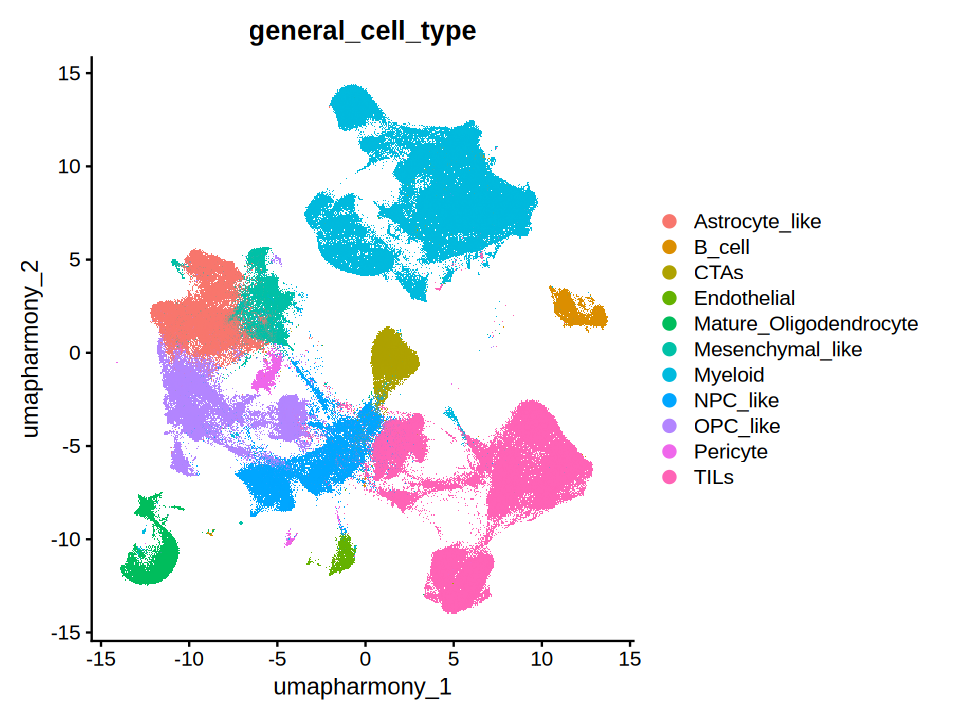

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'general_cell_type', label = FALSE)

In [6]:
# # Remove specified cell type annotations from the Seurat object
# remove_types <- c("Melanoma_Metas", "Lung_Metas")
# message("Removing annotations: ", paste(remove_types, collapse = ", "))

# message("Counts before removal:")
# print(table(obj$general_cell_type))

# obj <- subset(obj, subset = !(general_cell_type %in% remove_types))

# # Drop unused factor levels in metadata
# # obj@meta.data$general_cell_type <- droplevels(obj@meta.data$general_cell_type)

# # Ensure Idents reflect the current metadata column (optional but helpful for downstream code)
# if ("general_cell_type" %in% colnames(obj@meta.data)) {
#     Idents(obj) <- "general_cell_type"
# }

# message("Removal complete. Counts after removal:")
# print(table(obj$general_cell_type))

In [ ]:
# Save new obj 
# saveRDS(obj, '/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/harmony_cleaned_annotated_v3.rds')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



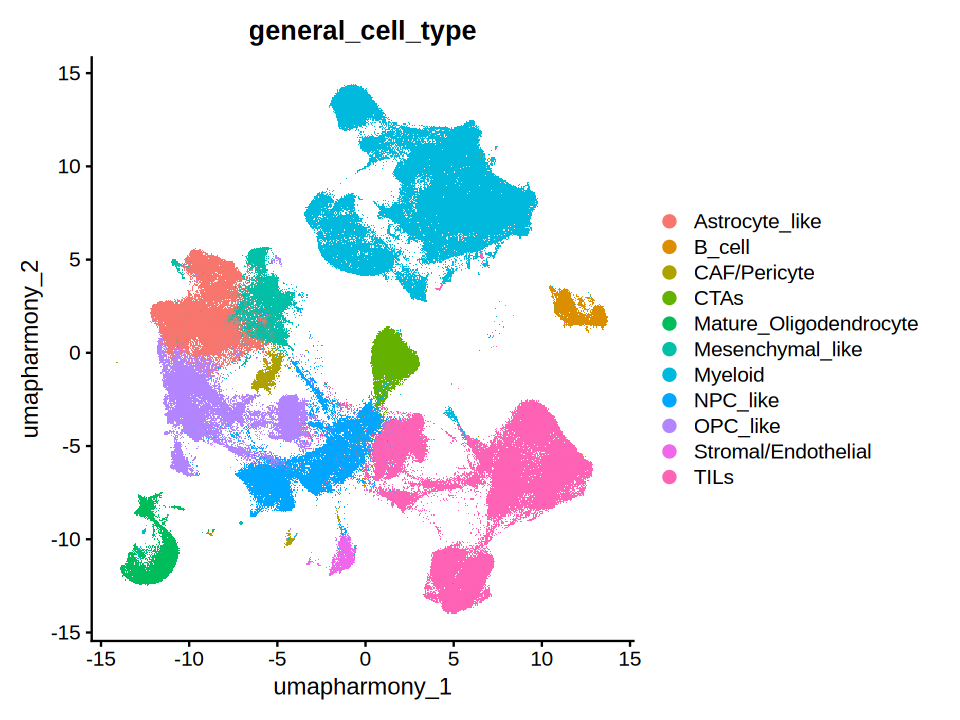

In [7]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'general_cell_type', label = FALSE)

# Enhanced UMAP Visualization

In [7]:
# Get all unique cell types from the specified metadata column
cell_types <- levels(factor(obj$general_cell_type))
num_cell_types <- length(cell_types)

message(paste("Found", num_cell_types, "cell types in 'general_cell_type' metadata."))

Found 11 cell types in 'general_cell_type' metadata.



In [8]:
polychrome_12 <- c(
    "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#F781BF", "#A65628",
    "#8DD3C7", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#678d8dff")

In [9]:
# Create the final color vector
if (num_cell_types > length(polychrome_12)) {
    # If there are more cell types than predefined colors, warn the user
    # and generate the remaining colors. Manual curation is best here.
    warning(paste("Number of cell types (", num_cell_types, ") exceeds the 25 predefined colors.
                   Generating extra colors via colorRampPalette.
                   For true publication quality, manual curation of this palette is recommended."))
    color_ramp <- colorRampPalette(polychrome_12)
    custom_colors <- color_ramp(num_cell_types)
} else {
    # Otherwise, just take the first N colors from the palette
    custom_colors <- polychrome_12[1:num_cell_types]
}

In [10]:
# Create the named vector to map colors to cell types explicitly
# This ensures consistency in plotting
names(custom_colors) <- cell_types

message("Custom color palette defined and mapped to cell types.")

Custom color palette defined and mapped to cell types.



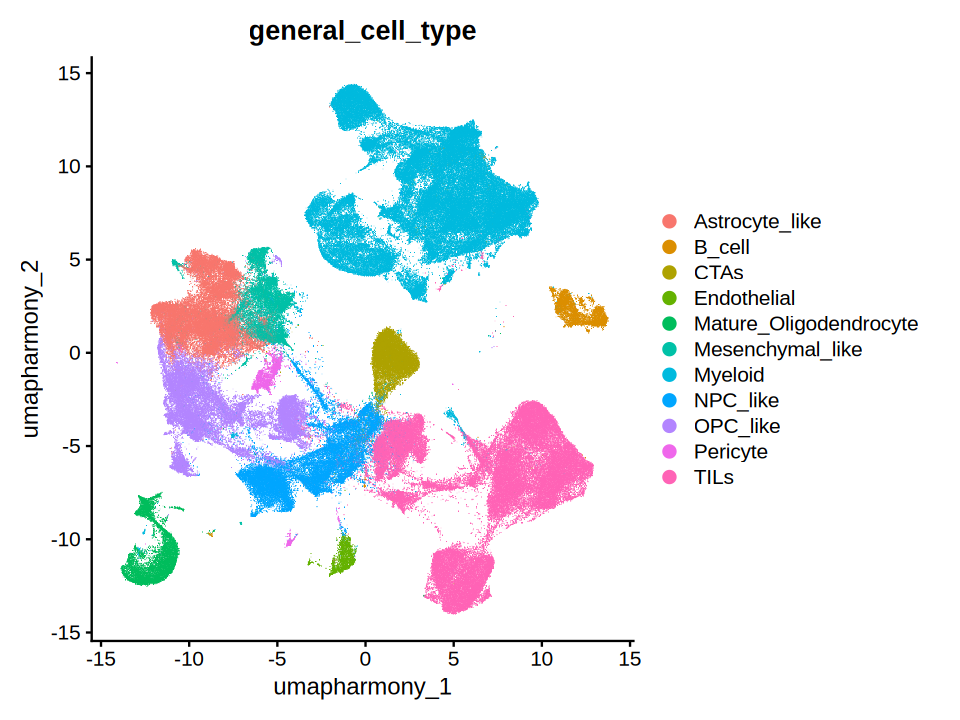

In [11]:
# Generate the base DimPlot
# We use Seurat's built-in rasterization, which is efficient
p_base <- DimPlot(
    obj,
    reduction = "umap.harmony",   # Requirement: Use 'umap.harmony'
    group.by = "general_cell_type", # Requirement: Group by cell type
    
    # Data Representation Requirements
    label = FALSE,                # Requirement: No text labels on plot
    pt.size = 1.5,                # Requirement: Small point size for 350k cells
    
    # Rasterization Requirement
    raster = TRUE,                # Requirement: Rasterize point layer
    raster.dpi = c(1024, 1024)    # High DPI for crisp points
)

p_base

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


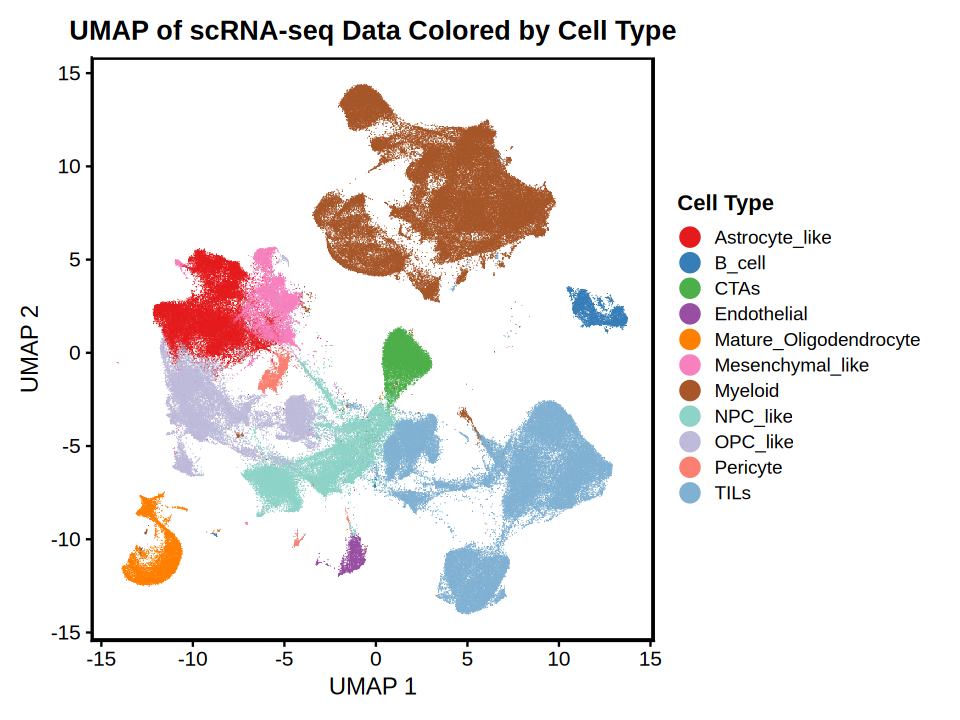

In [12]:
p_formatted <- p_base +
    # Apply the custom, named color palette
    scale_color_manual(values = custom_colors) +

    # Set correct axis and legend titles
    labs(
        x = "UMAP 1",
        y = "UMAP 2",
        title = "UMAP of scRNA-seq Data Colored by Cell Type",
        color = "Cell Type" # Renames the legend title
    ) +

    # Apply a minimal, publication-ready theme
    theme_cowplot() +
    
    # Theme adjustments for a clean, final look
    theme(
        # Set text sizes
        axis.text = element_text(size = 12, color = "black"),
        axis.title = element_text(size = 14, color = "black"),
        legend.text = element_text(size = 11, color = "black"),
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        legend.title = element_text(size = 13, face = "bold", color = "black"),
        
        # Requirement: Remove all background gridlines
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        
        # Requirement: Add a clean panel border
        panel.border = element_rect(color = "black", fill = NA, size = 1),
        
        # Ensure plot axis lines are visible
        axis.line = element_line(color = "black")
    ) +
    
    # Requirement: Increase legend point size for clarity
    guides(color = guide_legend(
        override.aes = list(size = 5),
        ncol = 1 # Ensure legend is a single vertical column
    ))

p_formatted

In [37]:
# Save 
ggsave(
  filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/UMAP_Publication_Ready.png",
  plot = p_formatted,
  device = "png",        # Uses svglite if installed
  width = 8,             # Width in inches
  height = 6,            # Height in inches
  units = "in",
  dpi = 600,             # Even for vectors, this sets precision
  bg = "white",          # Ensure background isn't transparent (optional)
  limitsize = FALSE      # Allows saving large files if necessary
)

# Enhanced DotPlot Visualization

In [13]:
Idents(obj) <- 'SCT_snn_res.0.2'

In [14]:
obj <- PrepSCTFindMarkers(obj, assay = "SCT", verbose = TRUE)

Found 10 SCT models. Recorrecting SCT counts using minimum median counts: 1794



In [15]:
obj$general_cell_type |> unique()

[1] "NPC_like"               "Mesenchymal_like"       "OPC_like"              
 [4] "Endothelial"            "Astrocyte_like"         "TILs"                  
 [7] "Myeloid"                "Mature_Oligodendrocyte" "CTAs"                  
[10] "Pericyte"               "B_cell"

In [16]:
Idents(obj) <- 'general_cell_type'

In [17]:
obj$general_cell_type |> unique()

[1] "NPC_like"               "Mesenchymal_like"       "OPC_like"              
 [4] "Endothelial"            "Astrocyte_like"         "TILs"                  
 [7] "Myeloid"                "Mature_Oligodendrocyte" "CTAs"                  
[10] "Pericyte"               "B_cell"

In [20]:
obj

An object of class Seurat 
74637 features across 346898 samples within 2 assays 
Active assay: RNA (38606 features, 0 variable features)
 11 layers present: counts, data.PRJNA1125010, data.PRJNA1131103, data.PRJNA1134206, data.PRJNA1141154, data.PRJNA1212512, data.PRJNA683876, data.PRJNA797449, data.PRJNA887804, data.PRJNA887805, data.PRJNA995768
 1 other assay present: SCT
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [18]:
library(presto)

Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.4.3”
Loading required package: data.table

Warning message:
“package ‘data.table’ was built under R version 4.4.3”

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [19]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = obj,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster NPC_like



Calculating cluster Mesenchymal_like

Calculating cluster OPC_like

Calculating cluster Endothelial

Calculating cluster Astrocyte_like

Calculating cluster TILs

Calculating cluster Myeloid

Calculating cluster Mature_Oligodendrocyte

Calculating cluster CTAs

Calculating cluster Pericyte

Calculating cluster B_cell



In [25]:
all_markers$cluster |> unique()

[1] NPC_like               Mesenchymal_like       OPC_like              
 [4] Endothelial            Astrocyte_like         TILs                  
 [7] Myeloid                Mature_Oligodendrocyte CTAs                  
[10] Pericyte               B_cell                
11 Levels: NPC_like Mesenchymal_like OPC_like Endothelial ... B_cell

In [23]:
opc <- all_markers |> filter(cluster == 'OPC_like') |> arrange(desc(avg_log2FC))
astro <- all_markers |> filter(cluster == 'Astrocyte_like') |> arrange(desc(avg_log2FC))
mesen <- all_markers |> filter(cluster == 'Mesenchymal_like') |> arrange(desc(avg_log2FC))
npc <- all_markers |> filter(cluster == 'NPC_like') |> arrange(desc(avg_log2FC))
endothelial <- all_markers |> filter(cluster == 'Endothelial') |> arrange(desc(avg_log2FC))
tils <- all_markers |> filter(cluster == 'TILs') |> arrange(desc(avg_log2FC))
myeloid <- all_markers |> filter(cluster == 'Myeloid') |> arrange(desc(avg_log2FC))
mature_oligo <- all_markers |> filter(cluster == 'Mature_Oligodendrocyte') |> arrange(desc(avg_log2FC))
ctas <- all_markers |> filter(cluster == 'CTAs') |> arrange(desc(avg_log2FC))
pericyte <- all_markers |> filter(cluster == 'Pericyte') |> arrange(desc(avg_log2FC))
b_cell <- all_markers |> filter(cluster == 'B_cell') |> arrange(desc(avg_log2FC))
# lung_metas <- all_markers |> filter(cluster == 'Lung_Metas') |> arrange(desc(avg_log2FC))  
# melanoma_metas <- all_markers |> filter(cluster == 'Melanoma_Metas') |> arrange(desc(avg_log2FC))

In [26]:
endothelial |> head(2)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CLDN5,0,10.40432,0.862,0.006,0,Endothelial,CLDN5
VWF,0,10.06057,0.782,0.004,0,Endothelial,VWF


In [29]:
cell_type_order <- c('Myeloid', 'TILs', 'B_cell', 'OPC_like', 'Astrocyte_like', 'Mesenchymal_like', 'NPC_like', 'Mature_Oligodendrocyte', 'Endothelial', 'Pericyte', 'CTAs')

In [30]:
markers <- c(
    # Myeloid
    'CD14', 'CD163', 'CD68',
    # TILs
    'CD3G', 'CD3D', 'CD3E',
    # B_cell
    'CD79A', 'MS4A1', 'FCRL1',
    # OPC_like
    'OLIG1', 'TNR', 'DSCAM',
    # Astrocyte_like
    'GFAP', 'SLC4A4', 'RFX4',
    # Mesenchymal_like
    'CHI3L1', 'VEGFA', 'CLU',
    # NPC_like
    'GNG4', 'TUBB3', 'UCHL1',
    # Mature_Oligodendrocyte
    'OPALIN', 'MOG', 'MAG',
    # Endothelial
    'CLDN5', 'VWF', 'TIE1',
    # Pericyte
    'COL3A1', 'COL1A1', 'COL6A3',
    # CTAs
    'VCX', 'VCX3A', 'MAGEA4'
    # Lung_Metas
    #'NKX2-1', 'FOXA1', 'SFTA2', # SFTA2, SFTA3
    # Melanoma_Metas
    #'TYR', 'MLANA', 'PMEL'
)

In [31]:
obj@meta.data$general_cell_type <- factor(obj@meta.data$general_cell_type, levels = cell_type_order)
obj$general_cell_type |> levels()

[1] "Myeloid"                "TILs"                   "B_cell"                
 [4] "OPC_like"               "Astrocyte_like"         "Mesenchymal_like"      
 [7] "NPC_like"               "Mature_Oligodendrocyte" "Endothelial"           
[10] "Pericyte"               "CTAs"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


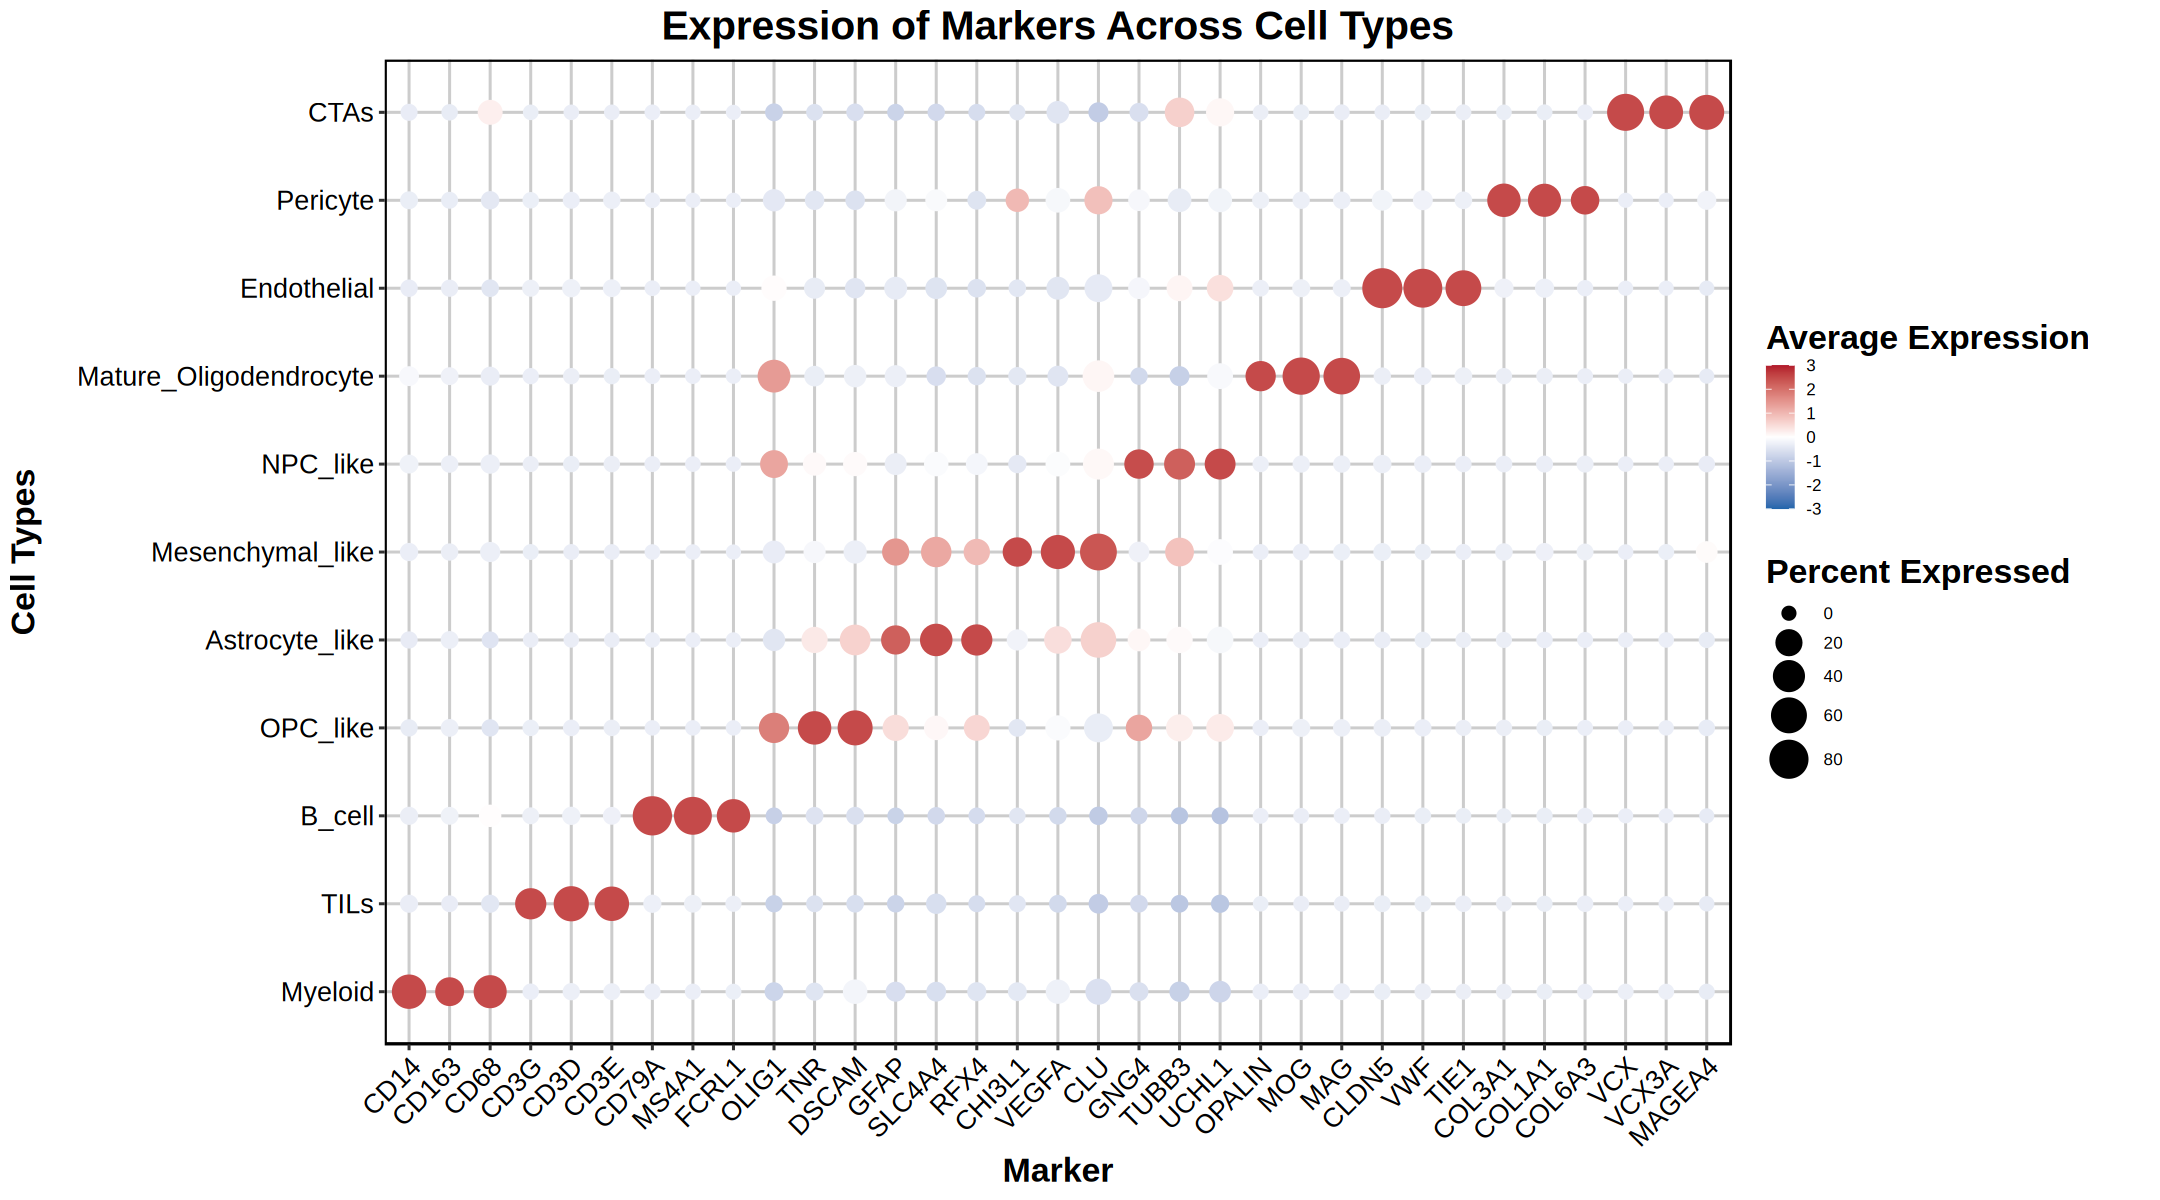

In [32]:
options(repr.plot.width = 18, repr.plot.height = 10)
p_dot <- DotPlot(
  object = obj,
  features = markers,
  group.by = "general_cell_type"
) +
  scale_color_gradientn(
    colors = c("#2166AC", "white", "#B2182B"), 
    limits = c(-3, 3)
  ) +
  scale_size(range = c(3, 10)) +
  RotatedAxis() +
  labs(
    title = "Expression of Markers Across Cell Types",
    x = "Marker",
    y = "Cell Types",
    color = "Scaled Expression",
    size = "Percent Expressing"
  ) +
  theme_bw(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 24, hjust = 0.5),
    axis.title.x = element_text(face = "bold", size = 20),
    axis.title.y = element_text(face = "bold", size = 20),
    axis.text.x = element_text(color = "black", size = 16, angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black", size = 16),
    legend.title = element_text(face = "bold", size = 20),
    legend.text = element_text(size = 10),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank(),
        panel.border = element_rect(color = "black", fill = NA, size = 1)
)
p_dot

In [33]:
marker_list <- list(
  "Myeloid" = c('CD14', 'CD163', 'CD68'),
  "T Cells" = c('CD3G', 'CD3D', 'CD3E'),
  "B Cells" = c('CD79A', 'MS4A1', 'FCRL1'),
  "OPC-like" = c('OLIG1', 'TNR', 'DSCAM'),
  "Astro-like" = c('GFAP', 'SLC4A4', 'RFX4'),
  "Mes-like" = c('CHI3L1', 'VEGFA', 'CLU'),
  "NPC-like" = c('GNG4', 'TUBB3', 'UCHL1'),
  "Oligos" = c('OPALIN', 'MOG', 'MAG'),
  "Endothelial" = c('CLDN5', 'VWF', 'TIE1'),
  "Pericyte" = c('COL3A1', 'COL1A1', 'COL6A3'),
  "CTAs" = c('VCX', 'VCX3A', 'MAGEA4')
)

# Flatten the list for the Seurat function call
flat_markers <- unlist(marker_list)

In [34]:
p_base <- DotPlot(obj, features = flat_markers, group.by = "general_cell_type")
df <- p_base$data

In [35]:
# 3. Annotate the Data for Grouping
# We create a new column 'Gene_Group' based on our list above
df$Gene_Group <- NA
for (group in names(marker_list)) {
  df$Gene_Group[df$features.plot %in% marker_list[[group]]] <- group
}

# Enforce order of Gene Groups (so Myeloid is first, T cells second, etc.)
df$Gene_Group <- factor(df$Gene_Group, levels = names(marker_list))

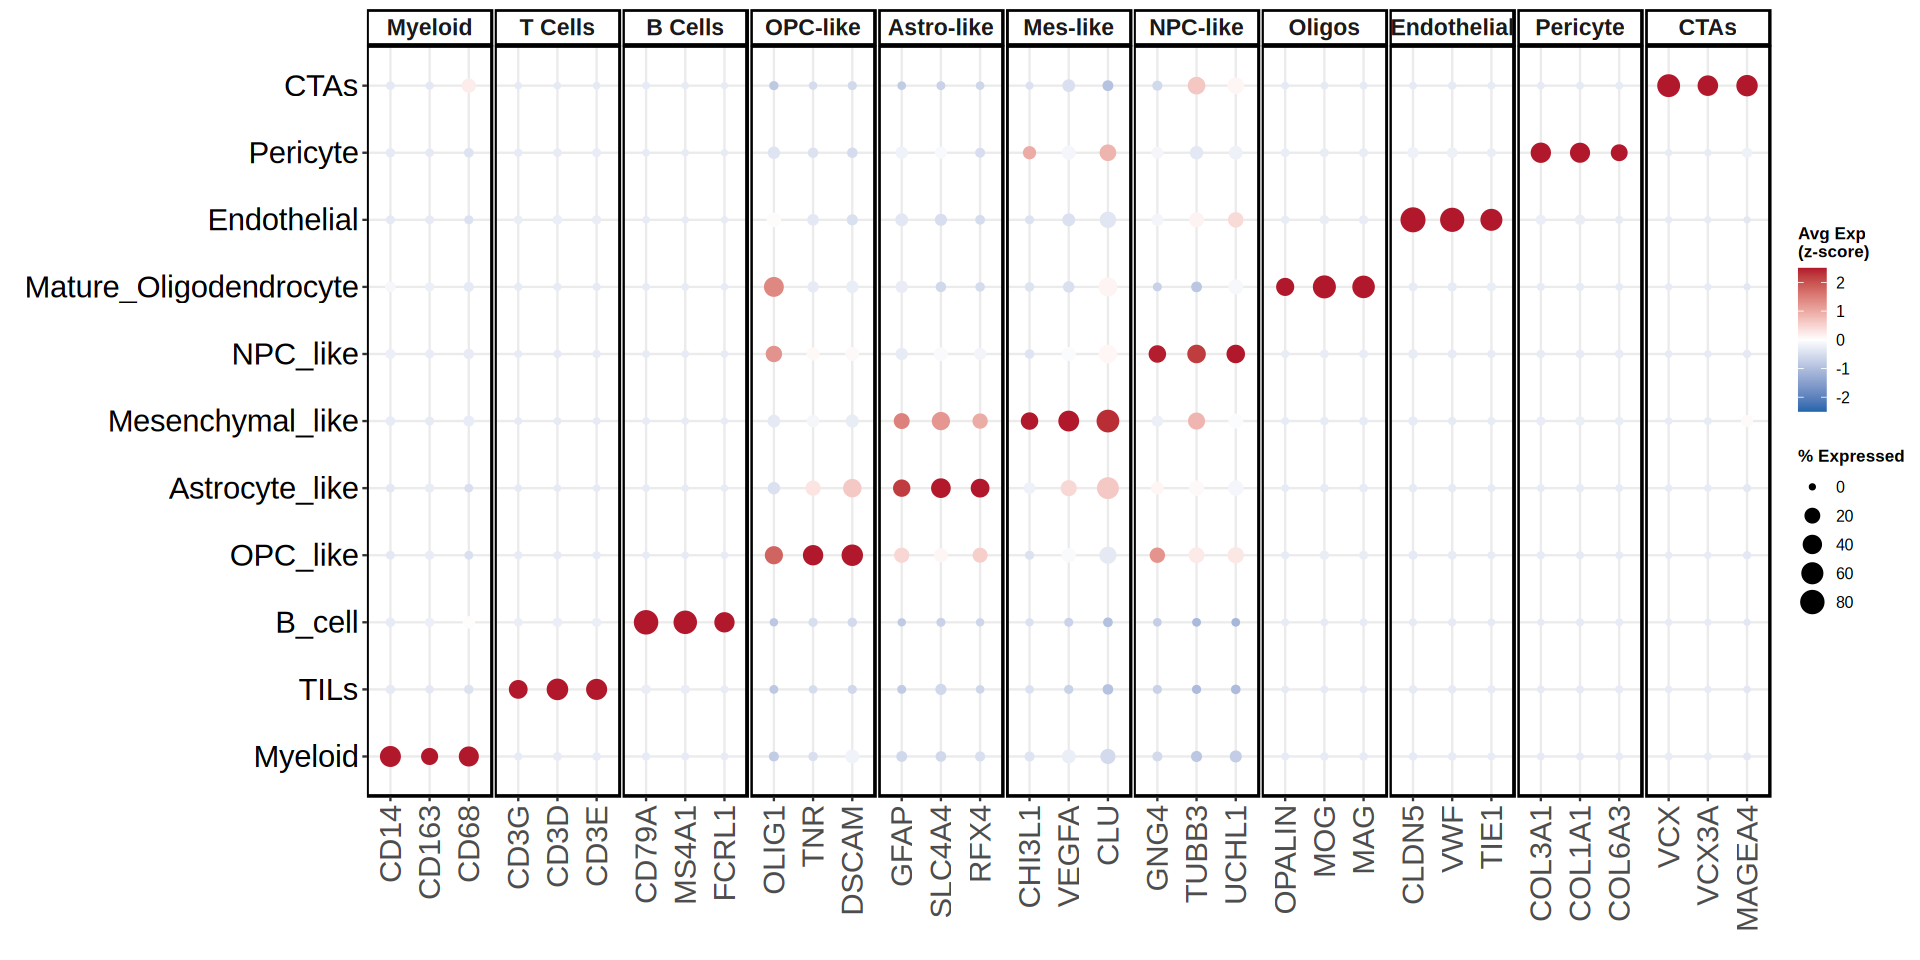

In [36]:
p_pub <- ggplot(df, aes(x = features.plot, y = id)) + 
  
  # The dots
  geom_point(aes(size = pct.exp, color = avg.exp.scaled)) +
  
  # COLOR SCHEME: 
  # Option A: Modern/Sharp (Viridis Magma) - Great for intensity
  # scale_color_viridis_c(option = "magma", direction = -1, name = "Avg Exp\n(Scaled)") +
  
  # Option B: Classic Red-Blue (Revised for better contrast)
  scale_color_gradient2(
    low = "#2166AC", mid = "white", high = "#B2182B", 
    midpoint = 0, limits = c(-2.5, 2.5), oob = scales::squish,
    name = "Avg Exp\n(z-score)"
  ) +
  
  # SIZE LEGEND
  scale_size(range = c(1, 6), name = "% Expressed") +
  
  # GROUPING (The key upgrade)
  facet_grid(. ~ Gene_Group, scales = "free_x", space = "free_x") +
  
  # LABELS
  labs(x = "", y = "") + # Remove redundant axis titles
  
  # THEME
  theme_bw() + # Start with a clean base
  theme(
    # Text Styles (Arial is standard)
    text = element_text(family = "Arial", color = "black"),
    
    # Axis Text
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 18),
    axis.text.y = element_text(size = 18, color = "black"),
    
    # Facet Strips (The gray boxes on top)
    strip.background = element_rect(fill = "white", color = "black", linewidth = 1),
    strip.text = element_text(face = "bold", size = 13.5, angle = 0),
    
    # Grid lines: Minimalist approach
    panel.grid.major = element_line(color = "grey92", linewidth = 0.5), 
    panel.grid.minor = element_blank(),
    
    # Borders
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    panel.spacing = unit(0.1, "lines"), # Reduce gap between groups
    
    # Legend
    legend.position = "right",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 9)
  )

# 6. Display
options(repr.plot.width = 16, repr.plot.height = 8)
print(p_pub)

In [38]:
ggsave(
  filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/Dotplot_Publication_Ready.png",
  plot = p_pub,
  device = "png",        # Uses svglite if installed
  width = 16,             # Width in inches
  height = 8,            # Height in inches
  units = "in",
  dpi = 600,             # Even for vectors, this sets precision
  bg = "white",          # Ensure background isn't transparent (optional)
  limitsize = FALSE      # Allows saving large files if necessary
)

In [40]:
library(patchwork)
library(viridis)
library(scales)

In [32]:
markers <- c(
    # Myeloid
    #'CD14', 'CD163', 'CD68',
    # TILs
    #'CD3G', 'CD3D', 'CD3E',
    # B_cell
    #'CD79A', 'MS4A1', 'FCRL1',
    # OPC_like
    'OLIG1', 'TNR', 'DSCAM',
    # Astrocyte_like
    'GFAP', 'SLC4A4', 'RFX4',
    # Mesenchymal_like
    'CHI3L1', 'VEGFA', 'CLU',
    # NPC_like
    'GNG4', 'TUBB3', 'UCHL1',
    # Mature_Oligodendrocyte
    'OPALIN', 'MOG', 'MAG'
    # Stromal/Endothelial
    #'CLDN5', 'VWF', 'TIE1',
    # CAF/Pericyte
    #'COL3A1', 'COL1A1', 'COL6A3',
    # CTAs
    #'VCX', 'VCX3A', 'MAGEA4'
    # Lung_Metas
    #'NKX2-1', 'FOXA1', 'SFTA2', # SFTA2, SFTA3
    # Melanoma_Metas
    #'TYR', 'MLANA', 'PMEL'
)

In [33]:
# # 2. Define a Publication-Quality Theme Function
# 2. UPDATED Theme Function with Borders
pub_theme <- function() {
  theme_void() + # Start clean
  theme(
    # --- The Border Settings ---
    # fill = NA ensures the box is transparent
    # linewidth = 1 creates a solid, defined publication border
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    
    # Text formatting
    plot.title = element_text(family = "Arial", face = "bold", size = 12, hjust = 0.5, margin = margin(b = 5)),
    
    # Legend adjustments (keep it minimal)
    legend.position = "right",
    legend.title = element_text(family = "Arial", size = 8, face = "bold"),
    legend.text = element_text(family = "Arial", size = 8),
    
    # Margin spacing between the plot content and the border
    plot.margin = margin(5, 5, 5, 5) 
  )
}

In [34]:
# 3. Create the Plots Loop
# 3. Generate Plots
plot_list <- lapply(markers, function(gene) {
  
  if(gene %in% rownames(obj)) {
    
    p <- FeaturePlot(
      obj,
      features = gene,
      reduction = "umap.harmony",
      order = TRUE,              # High expression on top
      pt.size = 0.75,             # Adjust size as needed
      raster = TRUE,             # Keep file size manageable
      raster.dpi = c(300, 300)   
    ) +
      # Use the Magma palette (Professional & High Contrast)
      scale_color_viridis_c(option = "viridis", name = "Exp") +
      
      # Apply the border theme
      pub_theme() + 
      
      # Fix aspect ratio so the border forms a shape relative to data, not the window
      coord_fixed() +
      
      # Remove the default axis titles provided by Seurat (UMAP_1, UMAP_2)
      # to keep it strictly a box with data inside
      xlab("") + ylab("")
      
    return(p)
  } else {
    return(NULL)
  }
})

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

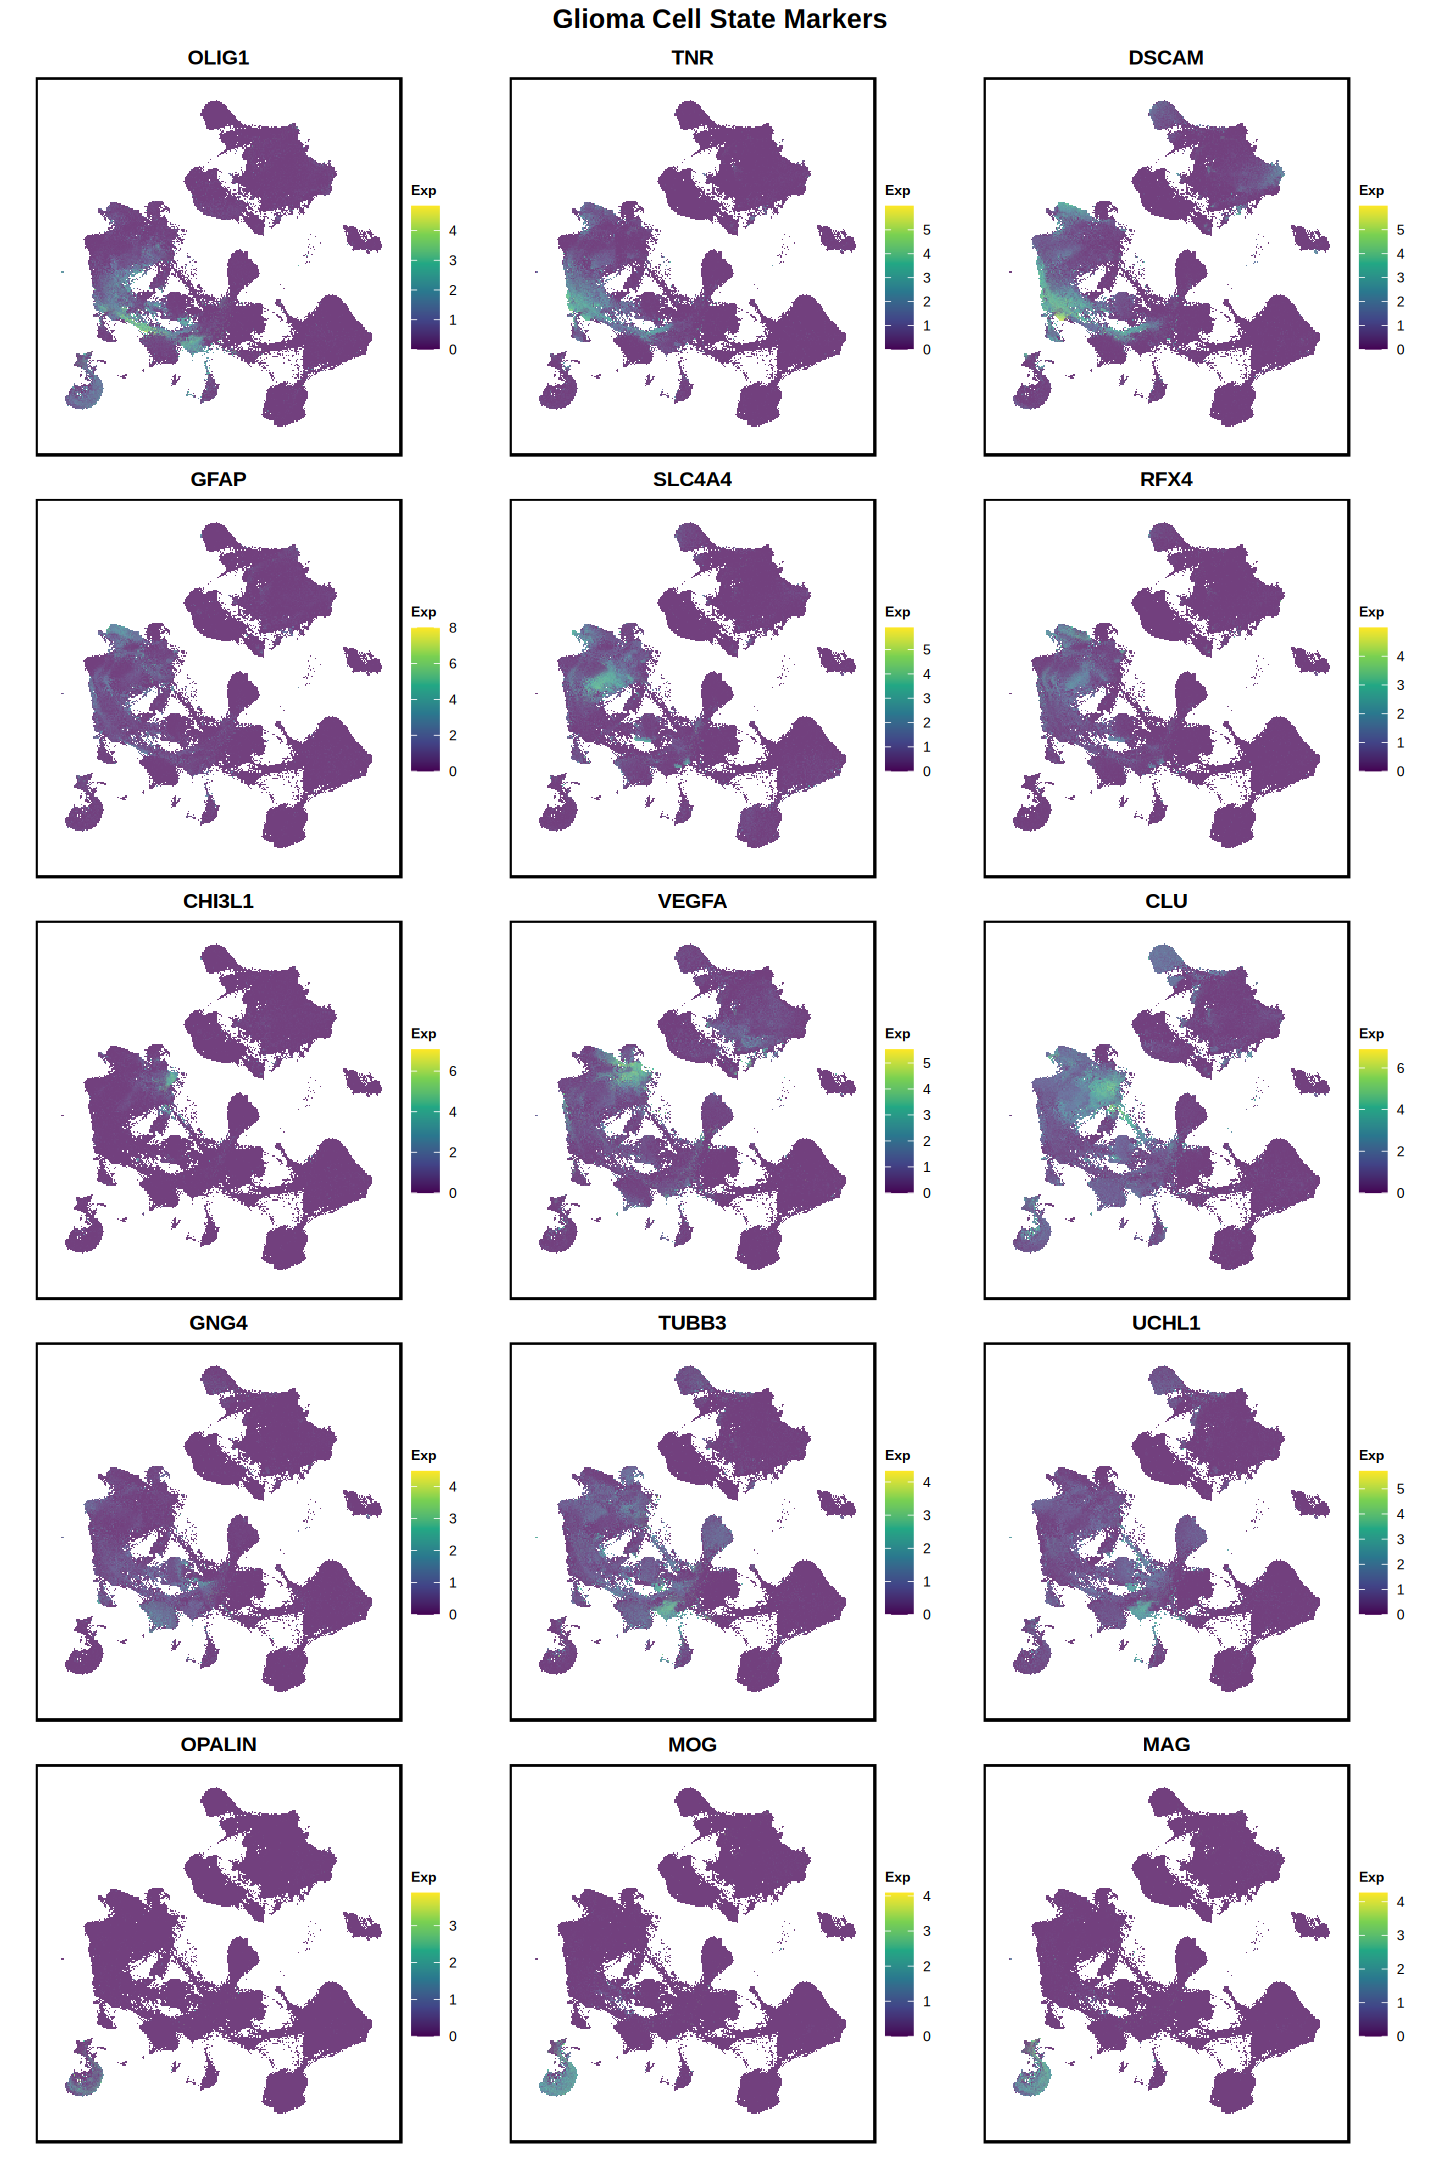

In [35]:
# Remove NULLs if any genes were missing
# Filter out NULLs
plot_list <- plot_list[!sapply(plot_list, is.null)]

# 4. Arrange the Layout
final_layout <- wrap_plots(plot_list, ncol = 3) + 
  plot_annotation(
    title = 'Glioma Cell State Markers',
    theme = theme(plot.title = element_text(family = "Arial", face = "bold", size = 16, hjust = 0.5))
  )

# 5. Display & Save
options(repr.plot.width = 12, repr.plot.height = 18)
print(final_layout)

In [36]:
ggsave(
  filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/FeaturePlot_Publication_Ready.png",
  plot = final_layout,
  device = "png",        # Uses svglite if installed
  width = 12,             # Width in inches
  height = 18,            # Height in inches
  units = "in",
  dpi = 600,             # Even for vectors, this sets precision
  bg = "white",          # Ensure background isn't transparent (optional)
  limitsize = FALSE      # Allows saving large files if necessary
)

In [50]:
obj$orig.ident |> unique()

[1] "PRJNA1125010" "PRJNA1131103" "PRJNA1134206" "PRJNA1141154" "PRJNA1212512"
 [6] "PRJNA683876"  "PRJNA797449"  "PRJNA887804"  "PRJNA887805"  "PRJNA995768"

Warning message in geom_bar(stat = "identity", color = "black", size = 0.2):
“Ignoring unknown parameters: `size`”


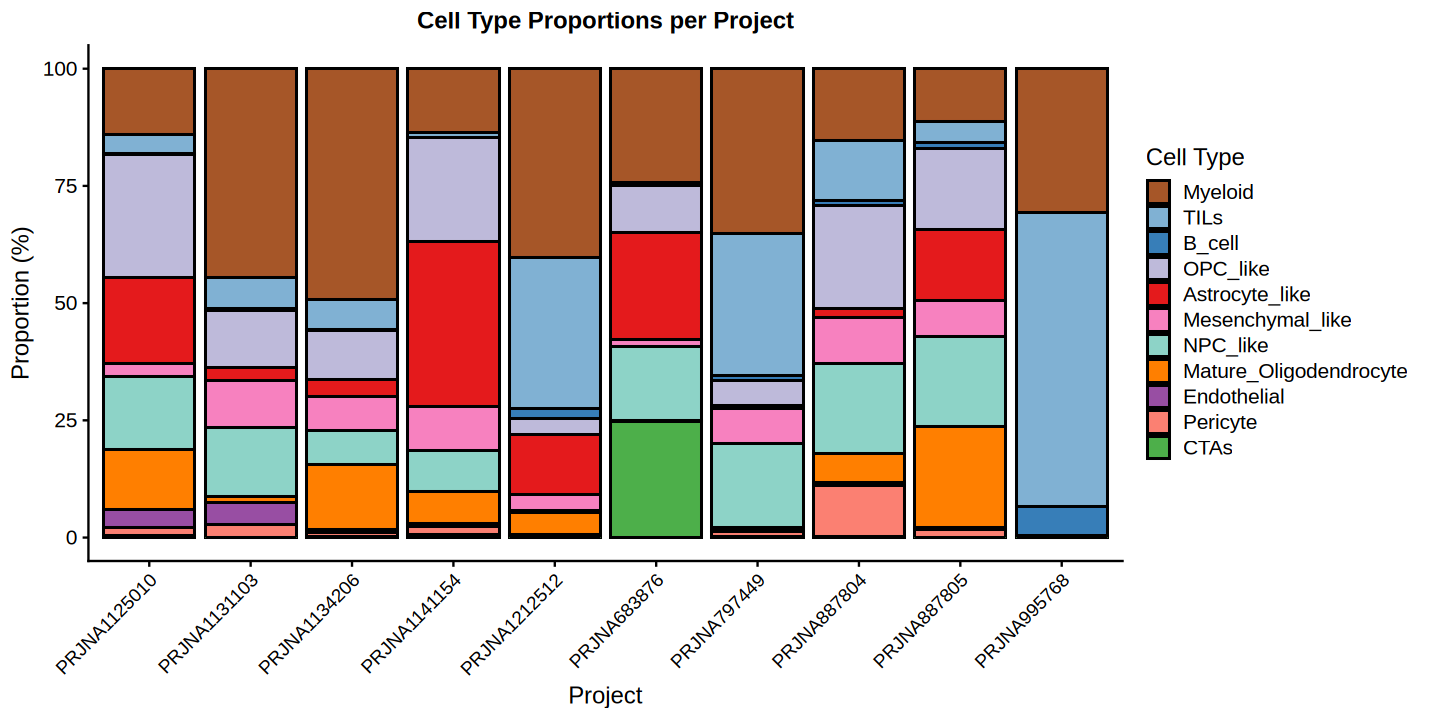

In [41]:
# Proportions of cell types within each project (orig.ident)
props_by_project <- obj@meta.data %>%
    as_tibble(rownames = "cell") %>%
    count(orig.ident, general_cell_type) %>%
    group_by(orig.ident) %>%
    mutate(proportion = n / sum(n) * 100) %>%
    ungroup() %>%
    # ensure consistent ordering of cell types
    mutate(general_cell_type = factor(general_cell_type, levels = cell_type_order))

# Plot stacked 100% bars per project showing cell type proportions
options(repr.plot.width = 12, repr.plot.height = 6)
p_prob <- ggplot(props_by_project, aes(x = orig.ident, y = proportion, fill = general_cell_type)) +
    geom_bar(stat = "identity", color = "black", size = 0.2) +
    scale_fill_manual(values = custom_colors) +
    labs(
        title = "Cell Type Proportions per Project",
        x = "Project",
        y = "Proportion (%)",
        fill = "Cell Type"
    ) +
    theme_cowplot() +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1, size = 11),
        plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        legend.position = "right"
    )
p_prob

In [42]:
ggsave(
  filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/Proportions_Publication_Ready.png",
  plot = p_prob,
  device = "png",        # Uses svglite if installed
  width = 12,             # Width in inches
  height = 6,            # Height in inches
  units = "in",
  dpi = 600,             # Even for vectors, this sets precision
  bg = "white",          # Ensure background isn't transparent (optional)
  limitsize = FALSE      # Allows saving large files if necessary
)